In [1]:
# Data science with python

# Application of data science

# Step 1
# Import necessary libraries
# %pip install scikit-learn
%pip install scipy

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\ClassWork\crop.csv")

df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Check null values

print(df.isnull().sum())

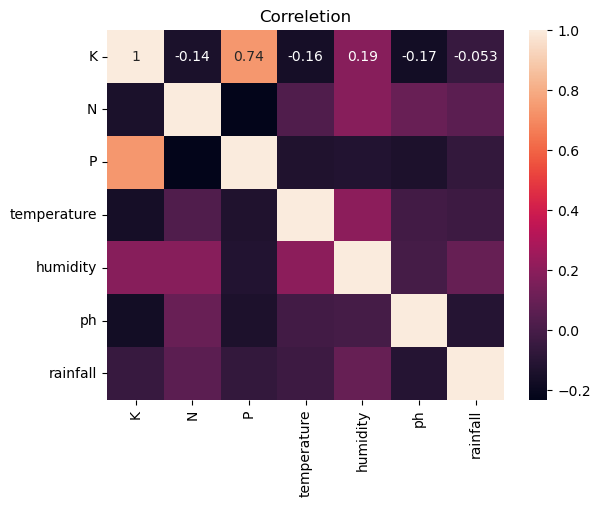

In [3]:
c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes

y = df.target
x = df[['K','N','P','temperature', 'humidity','ph', 'rainfall']]

sns.heatmap(x.corr(), annot=True)
plt.title("Correletion")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
# Selection of model: KNN, Confusion Matrix, Random forst, Use classification like SVM, decision tree
# Predict using knn

from sklearn.neighbors import KNeighborsClassifier 


knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
print(score)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, knn.predict(X_test_scaled))

df_cm = pd.DataFrame(mat,index=(i for i in targets.values()), columns=(targets.values()))
sns.heatmap(df_cm.corr())
plt.title("Confussion matrix")
plt.show()

In [ ]:
# Classification using Support Vector Classifier

from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train_scaled, y_train)
score = svc_linear.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='rbf')
svc_poly.fit(x_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

In [ ]:
# Classifier using decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

In [ ]:
# Classifier using decision random forest 

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

In [ ]:
# Machine learning
# Split data into three categories
# Numerical , Categorical and Ordinal

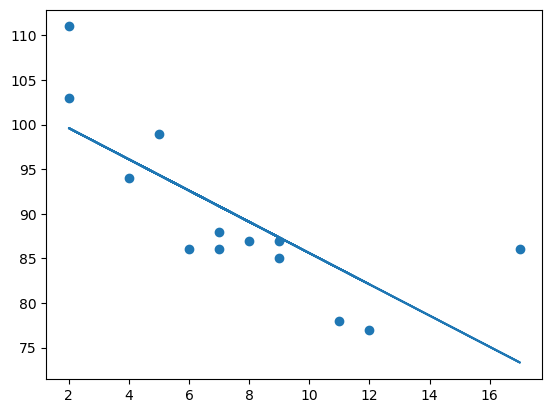

In [4]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()